In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sn

In [2]:
df = pd.read_csv('titanic.csv')
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print(df['Age'].median())
print(df['Age'].mean())
print(df['Age'].mode())

28.0
29.69911764705882
0    24.0
Name: Age, dtype: float64


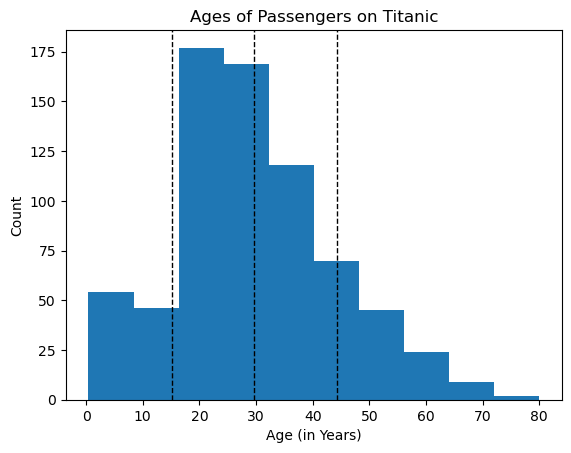

In [8]:
plt.hist(df.Age)
plt.axvline(df.Age.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Ages of Passengers on Titanic')
plt.ylabel('Count')
plt.xlabel('Age (in Years)')
plt.axvline(df.Age.mean()+df.Age.std(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df.Age.mean()-df.Age.std(), color='k', linestyle='dashed', linewidth=1)

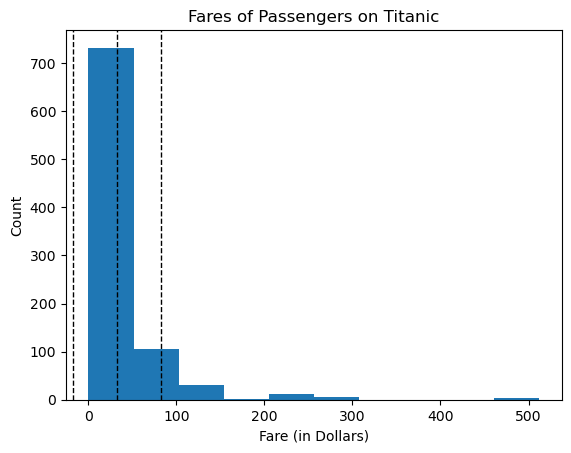

In [9]:
plt.hist(df.Fare)
plt.axvline(df.Fare.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Fares of Passengers on Titanic')
plt.ylabel('Count')
plt.xlabel('Fare (in Dollars)')
plt.axvline(df.Fare.mean()+df.Fare.std(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df.Fare.mean()-df.Fare.std(), color='k', linestyle='dashed', linewidth=1)

In [10]:
df['Survived'].corr(df['Age'])

-0.07722109457217759

In [11]:
df['Sex'].str.get_dummies().corrwith(df['Survived']/df['Survived'].max())

female    0.543351
male     -0.543351
dtype: float64

In [12]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


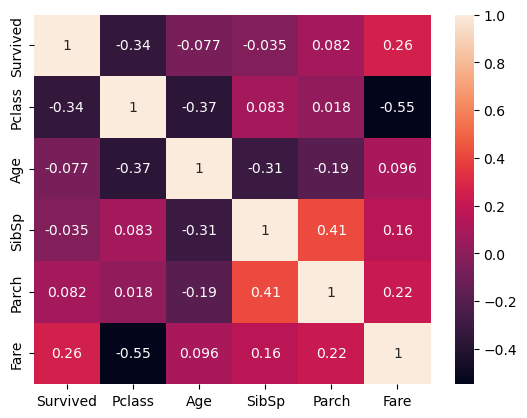

In [13]:
df = df.drop(['PassengerId'], axis=1)
sn.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
children = df[df['Age'] < 16]
children.shape

(83, 11)

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

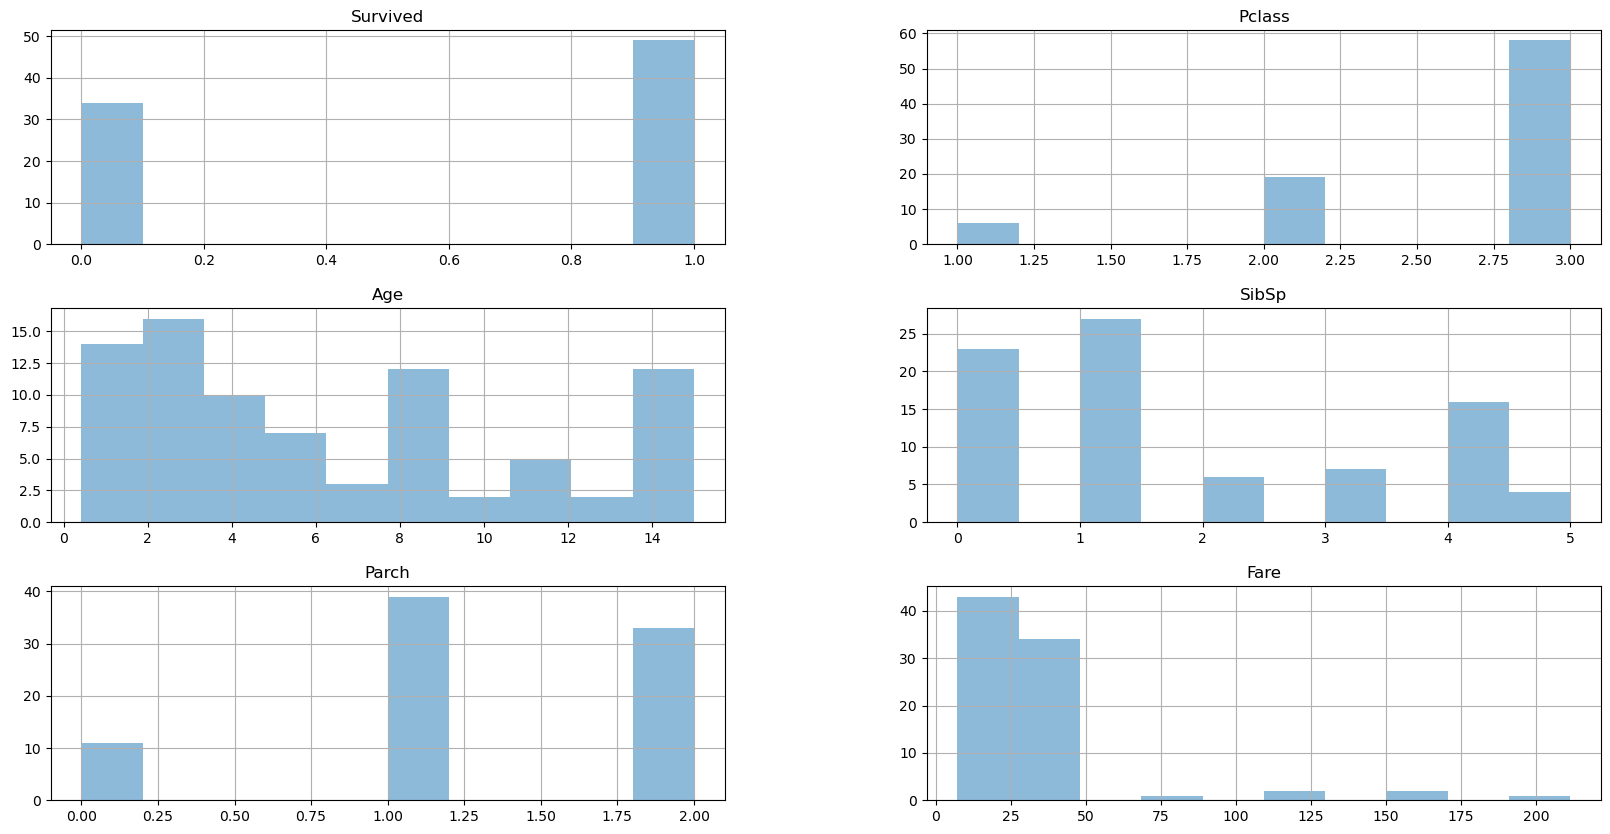

In [15]:
children.hist(alpha=0.5, figsize=(20, 10))

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

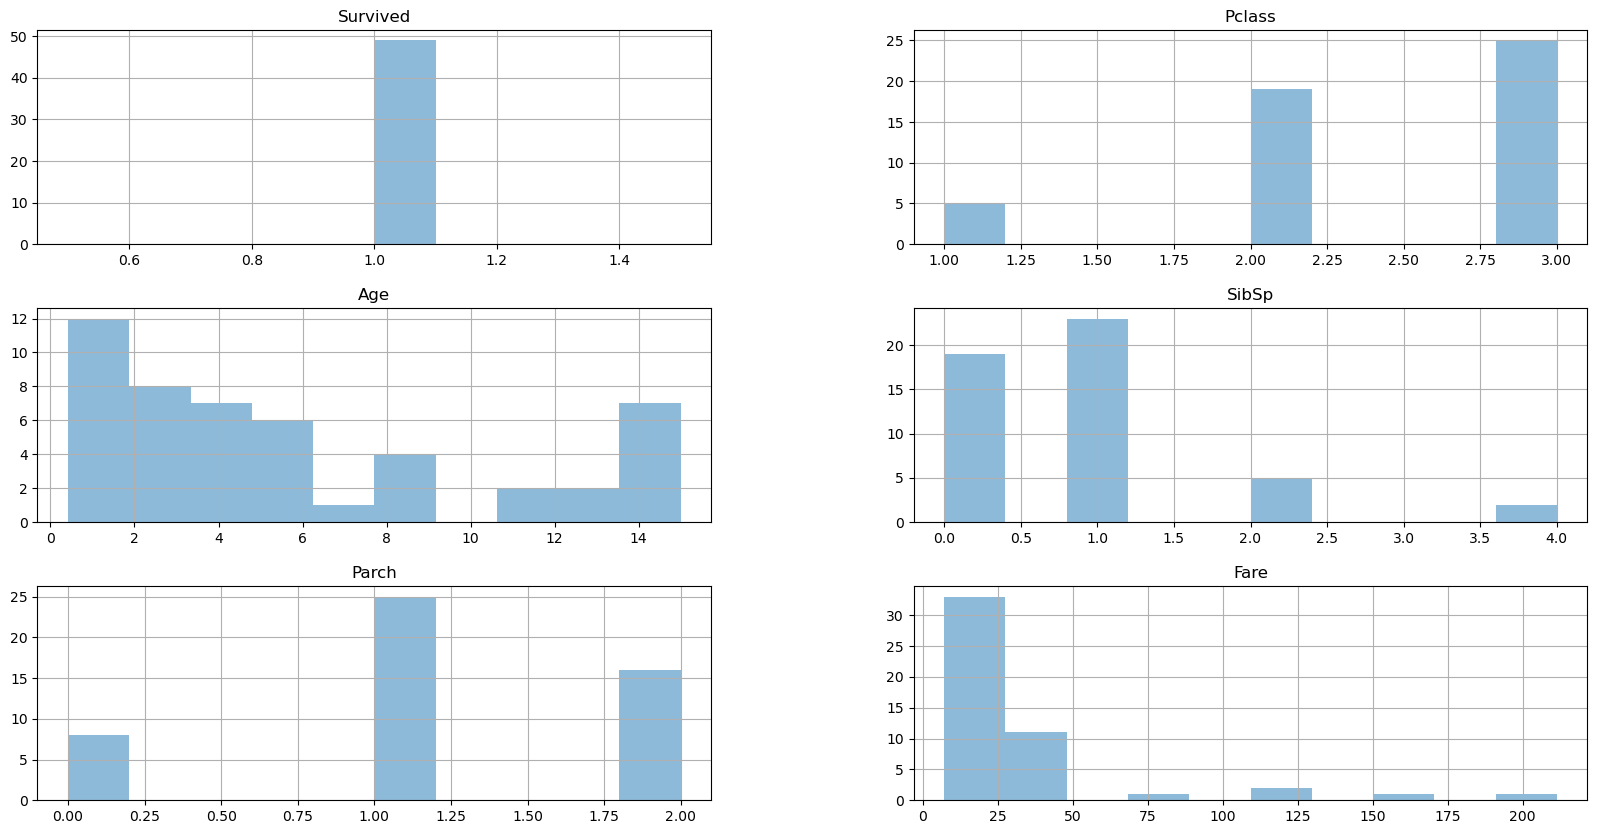

In [16]:
survived_children = df[(df['Age'] < 16) & (df['Survived'] == 1)]
survived_children.hist(alpha=0.5, figsize=(20, 10))

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

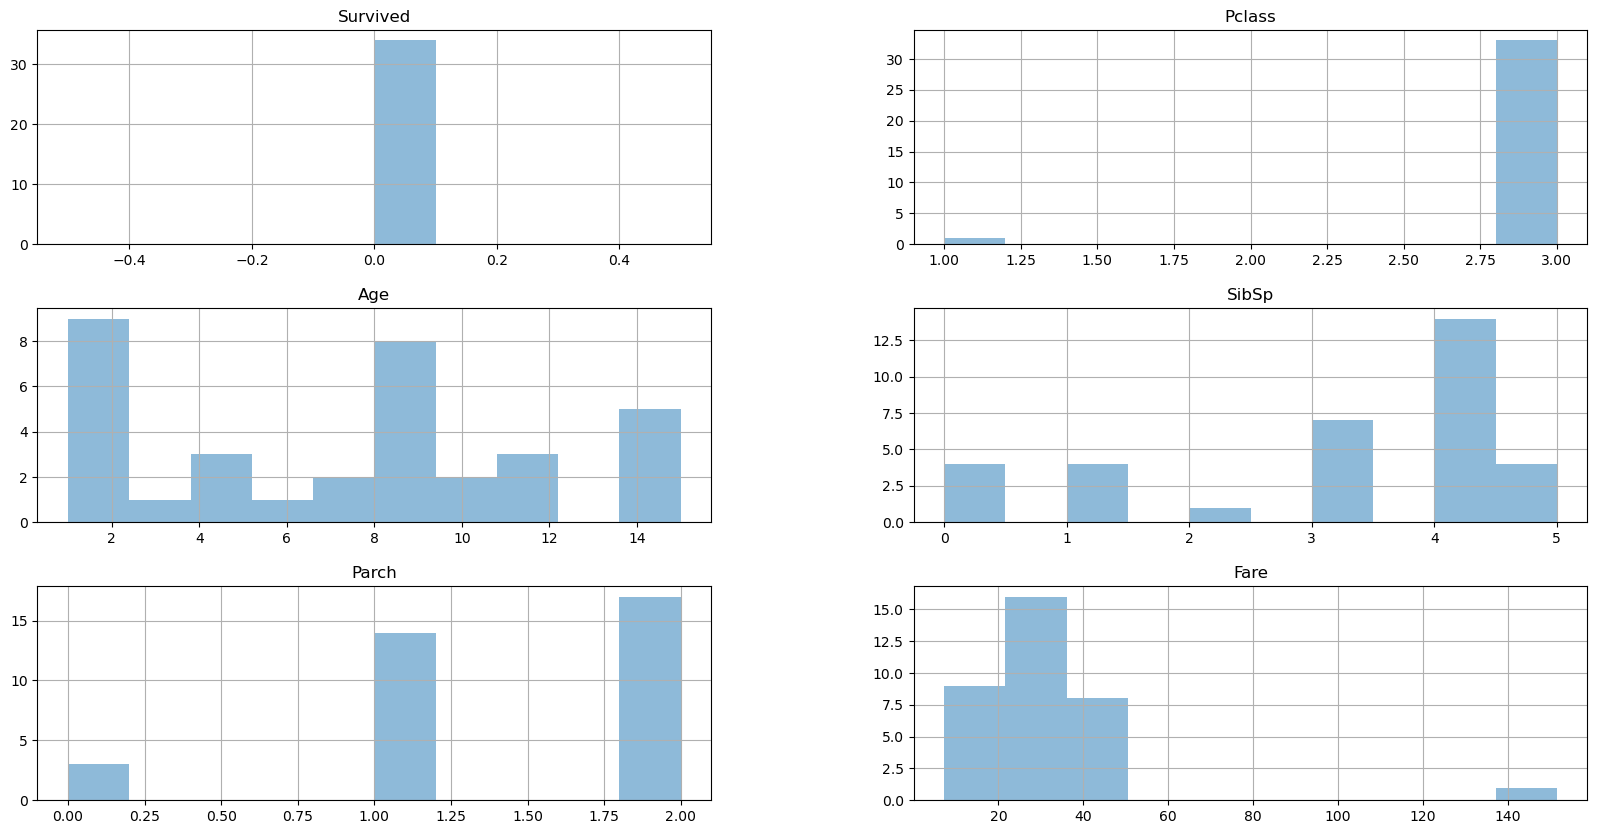

In [17]:
not_survived_children = df[(df['Age'] < 16) & (df['Survived'] == 0)]
not_survived_children.hist(alpha=0.5, figsize=(20, 10))

In [18]:
women_and_children = df[(df['Sex'].str.match("female")) | (df['Age'] < 16)]
w_a_c_survival_rate = women_and_children['Survived'].value_counts(normalize=True) * 100
w_a_c_survival_rate

1    71.751412
0    28.248588
Name: Survived, dtype: float64

In [20]:
men = df[(df['Sex'].str.match('male')) & (df['Age'] > 16)]
m_survival_rate = men['Survived'].value_counts(normalize=True) * 100
m_survival_rate

0    82.338308
1    17.661692
Name: Survived, dtype: float64

In [21]:
children = df[df['Age'] < 16]
surviving_children = df[(df['Age'] < 16) & (df['Survived'] == 1)]
child_chance_of_survival = surviving_children.shape[0] / children.shape[0]
format(child_chance_of_survival, ".0%")

'59%'

In [22]:
women = df[(df['Sex'] == 'female') & (df['Age'] > 16)]
surviving_women = df[(df['Sex'] == 'female') & (df['Age'] > 16) & (df['Survived'] == 1)]
women_chance_of_survival = surviving_women.shape[0] / women.shape[0]
format(women_chance_of_survival, ".0%")

'77%'

In [23]:
men = df[(df['Sex'] == 'male') & (df['Age'] > 16)]
surviving_men = df[(df['Sex'] == 'male') & (df['Age'] > 16) & (df['Survived'] == 1)]
men_chance_of_survival = surviving_men.shape[0] / men.shape[0]
format(men_chance_of_survival, ".0%")

'18%'

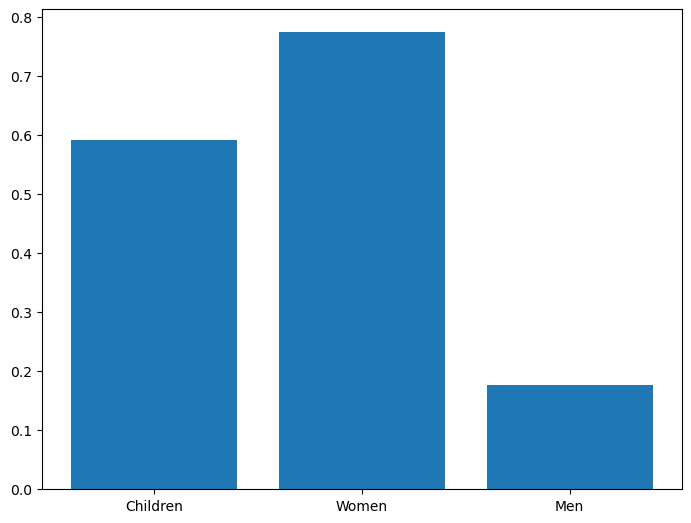

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = ["Children", "Women", "Men"]
data = [child_chance_of_survival, women_chance_of_survival, men_chance_of_survival]
ax.bar(x_axis, data)
plt.show()

In [25]:
surviving_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Survived'] == 1)]
surviving_men.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,71.0,71.000000,71.000000,71.000000,71.000000,71.000000
mean,1.0,1.873239,34.323944,0.267606,0.126761,46.731869
std,0.0,0.955130,11.798032,0.476827,0.411602,85.316448
min,1.0,1.000000,17.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,26.500000,0.000000,0.000000,8.050000
50%,1.0,1.000000,32.000000,0.000000,0.000000,26.550000
75%,1.0,3.000000,41.000000,0.500000,0.000000,54.270850
max,1.0,3.000000,80.000000,2.000000,2.000000,512.329200


In [27]:
not_surviving_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Survived'] == 0)]
not_surviving_men.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,331.0,331.000000,331.000000,331.000000,331.000000,331.000000
mean,0.0,2.383686,33.496979,0.250755,0.166163,22.562523
std,0.0,0.779028,12.970596,0.516947,0.566384,33.570494
min,0.0,1.000000,17.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,23.000000,0.000000,0.000000,7.854200
50%,0.0,3.000000,30.000000,0.000000,0.000000,10.170800
75%,0.0,3.000000,40.500000,0.000000,0.000000,26.000000
max,0.0,3.000000,74.000000,3.000000,5.000000,263.000000


In [28]:
first_class_adult_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Pclass'] == 1)]
first_class_adult_men_survival_rate = first_class_adult_men['Survived'].value_counts(normalize=True) * 100
first_class_adult_men_survival_rate

0    62.244898
1    37.755102
Name: Survived, dtype: float64

In [29]:
second_class_adult_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Pclass'] == 2)]
second_class_adult_men_survival_rate = second_class_adult_men['Survived'].value_counts(normalize=True) * 100
second_class_adult_men_survival_rate

0    93.181818
1     6.818182
Name: Survived, dtype: float64

In [30]:
third_class_adult_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Pclass'] == 3)]
third_class_adult_men_survival_rate = third_class_adult_men['Survived'].value_counts(normalize=True) * 100
third_class_adult_men_survival_rate

0    87.037037
1    12.962963
Name: Survived, dtype: float64

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

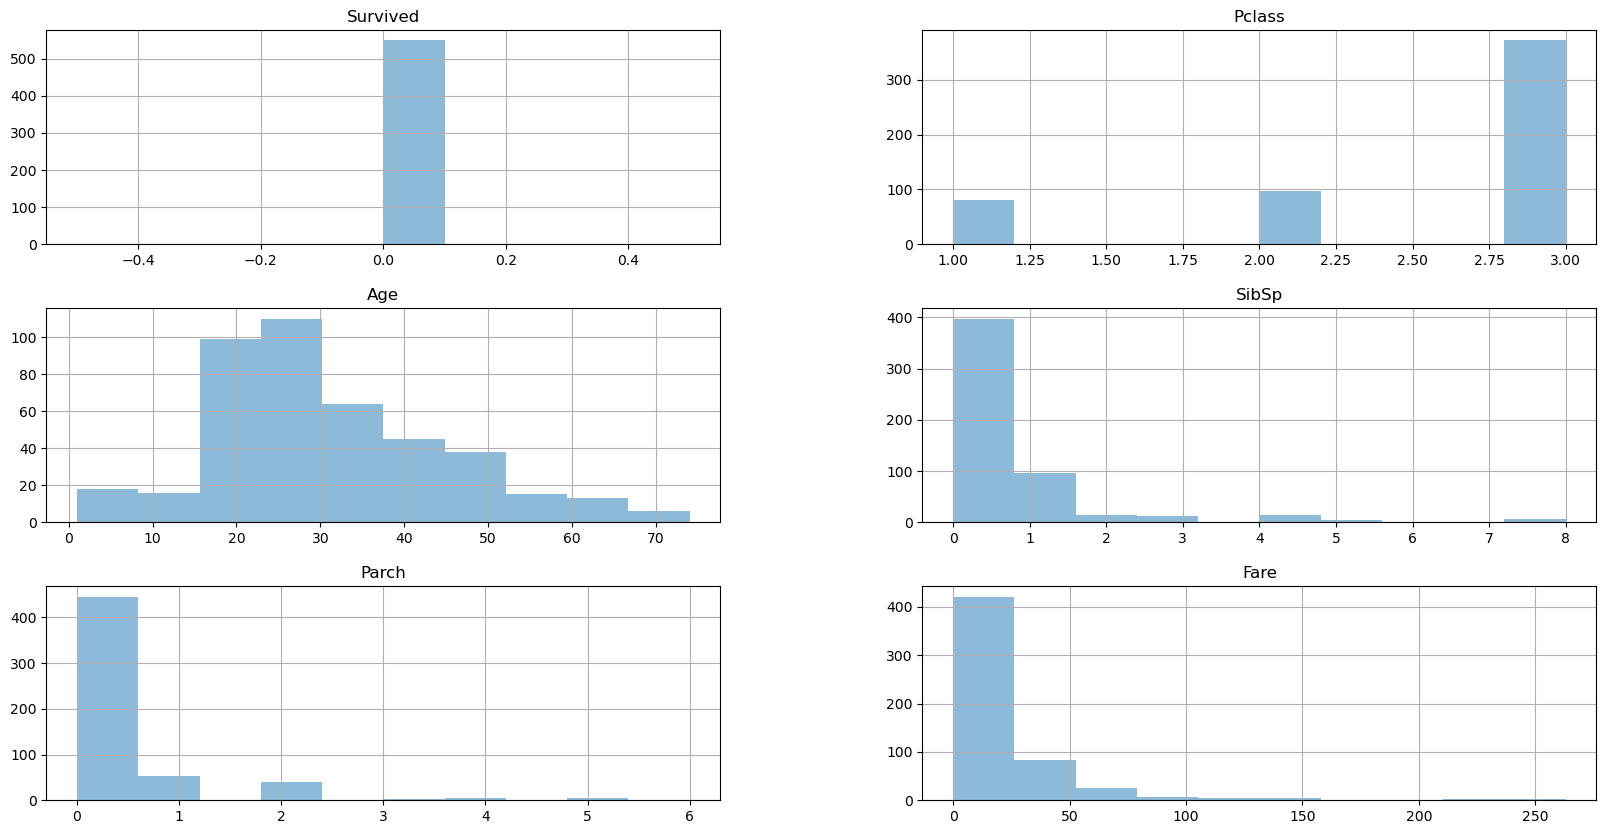

In [31]:
the_dead = df[df["Survived"] == 0]
the_dead.hist(alpha=0.5, figsize=(20, 10))

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

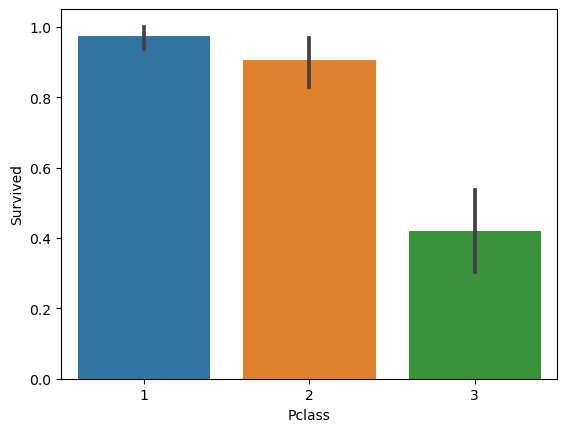

In [32]:
sn.barplot(x='Pclass', y='Survived', data=women)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

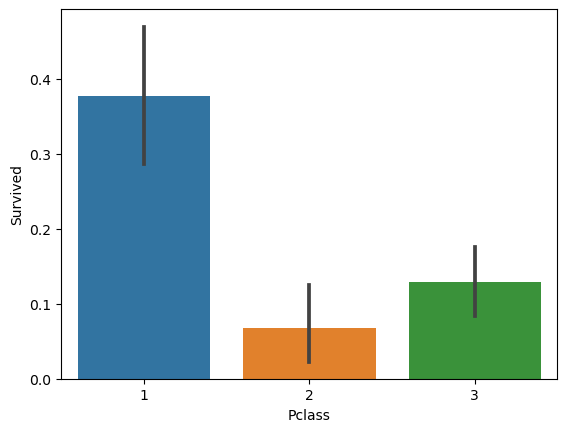

In [33]:
sn.barplot(x='Pclass', y='Survived', data=men)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

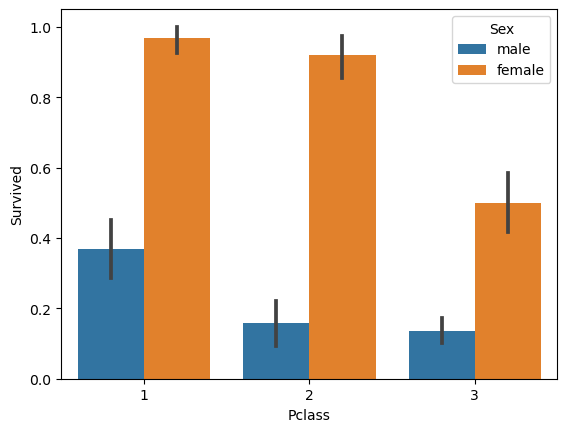

In [34]:
sn.barplot(x='Pclass', y='Survived', hue="Sex", data=df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

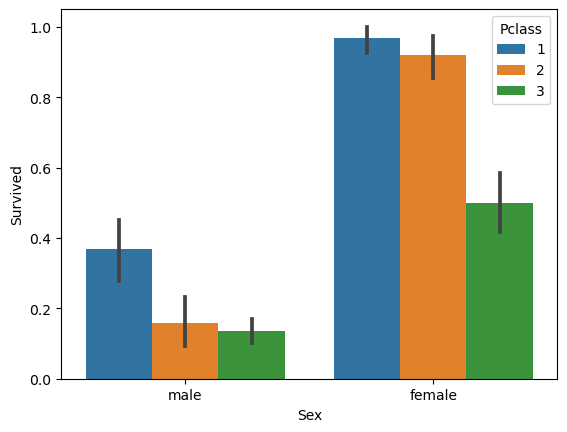

In [35]:
sn.barplot(x='Sex', y='Survived', hue="Pclass", data=df)